In [3]:
import pandas as pd #판다스
import numpy as np #넘파이
import seaborn as sns #씨본
import re #정규식
import matplotlib
import matplotlib.pyplot as plt #시각화
%matplotlib inline

#워드클라우드관련
from collections import Counter
from collections import OrderedDict
from konlpy.tag import Okt
from wordcloud import WordCloud
okt = Okt()

In [4]:
# 한국어 폰트를 위한 설정 !
# 한글폰트 파일을 업로드 주피터노트북에 미리 업로드 해놓고 불러오기 

from matplotlib import font_manager

# 맑은고딕
font_fname = 'fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname = font_fname).get_name()
plt.rcParams['font.family'] = font_family

# 전처리

In [5]:
# 고충민원 : Grievance

Grievance = pd.read_excel('8_연수구_고충민원_격자매핑.xlsx')
Grievance.head()

,apply_date,compl_contents,gid
0,202206,수급자 취직에 대한 고발 건,다사241365
1,202206,옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안,다사248368
2,202206,송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청,다사242367
3,202206,"옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공...",다사253364
4,202206,"옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리",다사242367


In [6]:
# null값 제거
Grievance = Grievance.dropna()
Grievance.reset_index(inplace = True)
Grievance.drop('index', axis = 1, inplace = True)

In [7]:
Grievance.head()

,apply_date,compl_contents,gid
0,202206,수급자 취직에 대한 고발 건,다사241365
1,202206,옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안,다사248368
2,202206,송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청,다사242367
3,202206,"옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공...",다사253364
4,202206,"옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리",다사242367


In [8]:
# 복사 : 원본 데이터 훼손 방지

Grievance2 = Grievance.copy()
Grievance2.head()

,apply_date,compl_contents,gid
0,202206,수급자 취직에 대한 고발 건,다사241365
1,202206,옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안,다사248368
2,202206,송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청,다사242367
3,202206,"옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공...",다사253364
4,202206,"옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리",다사242367


In [9]:
# 민원내용
# 문자열 메소드를 사용하기 위함
Grievance2['compl_contents'] = Grievance2['compl_contents'].astype('str')

In [10]:
# 민원내용 대략적 확인
Grievance2['compl_contents']

0                                         수급자 취직에 대한 고발 건
1                       옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안
2                           송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청
3       옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공...
4            옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리
                              ...                        
1508                                금연빌딩 앞 흡연 목격, 시정조치 부탁
1509                              커뮤니티센터 및 조경 업그레이드에 관한 건
1510                송도이편한세상아파트 공동주택 입주자대표회의 운영비 제정무효 민원제기
1511    1. 인천표준관리규약 부칙 제3조에 의하면 표준관리규약이 개정되면 60일 이내에,표...
1512                        아파트 주변 소음 분진 진동으로 인한 피해 해결 촉구
Name: compl_contents, Length: 1513, dtype: object

In [11]:
# 고충민원 전체 data 합침 : Grievance_text
# join 이용 : ' ' 띄어쓰기로 !

Grievance_text = ' '.join(Grievance2['compl_contents'])
Grievance_text

"수급자 취직에 대한 고발 건 옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안 송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청 옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공원 조성 요청 옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리 송도고등학교 정문앞 횡단보도 주차 및 역주행방지를 위한 설치물 설치요청 옥련현대3차아파트 입주자대표회의 동대표감사 황색실선설치동의서명서 공사장폐기물 신고 및 처리요청 도로 공사 요청 옥련4차 현대아파트 입주자대표회장,관리소장에 대한 처분요청 옥련동 현대아파트 선거관리 관련 옥련4처현대아파트 선거관리 관련 옥련동348-153번지 구청회신에 대한 정확한 답변 및 공사방해에 대한 해결책정리 및 확정요청의 건 착공계허가에 대한 구청의 협조 및 명확한 입장표명의 건 공사현장 출입구 재조정 요청 옥련동 현대4차아파트 공동주택관리에 대하여 감사원 징계요구 및 통보 내용 이행 요구 벌목 관련 민원 제기 건축허가 철회 요청 건축허가 철회 요청 송도역전시장 주차단속 및 대책마련 송도역전시장 주차단속금지 및 대책마련 송도역전시장 주차단속 금지 및 대책마련 송도럭키아파트 옥상방수공사에 대한 질의 건축허가 관련 옥련동 럭키송도아파트 - 관리규약 질의 한나루로158번길31 건물붕괴위험관련 재난위험지역 지정 요청 우성2차아파트 202동대표 선관위 관련 민원 가스계량기 교체 촉구 아파트선거관리위원회 서면동의 접수 관련 동춘동 건축물관련 시정촉구에 대한 행정조치 재건축사업을 위한 진정서 제출 옥련시장 관련 옥련시장 관련 부동산 중개업소 단속 사권제한토지 일반과세 전환에 관한 건 재개발 이주 협의 관련건 주정차 금지구역 지정 요청 동춘동843-2 건축물관련 행정조치 송도역 건설현장 사진 자료 제출 벽산빌리지 재건축 사업에 관한 민원 벽산빌리지 재건축 사업에 관한 민원 벽산빌리지 재건축 사업에 관한 민원 교통불편 해결 요청 옥련시장 아케이드 설치로 인한 피해 강제이행 부과금에 

In [12]:
# 민원 데이터 텍스트 파일로 저장 : '고충민원_text_data.txt'

with open('고충민원_text.txt', 'w', encoding='utf8') as f:
    f.write(Grievance_text)

In [13]:
# 민원 텍스트 데이터 파일 불러오기 : Grievance_text2

f = open('고충민원_text.txt', 'r', encoding='utf8')

Grievance_text2 = f.read()
Grievance_text2

"수급자 취직에 대한 고발 건 옥련동246 도시관리방안 수립용역 도시관리방안 검토 및 제안 송도고등학교 정문앞 역주행방지를 위한 설치물 설치요청 옥련동 348-203,153,182번지 단독주택부지 개발허가 취소 후 청량산 자연공원 조성 요청 옥련동 내 시각장애인보도 보수조치 요청(우리은행사거리,인송중사거리,옥련터널사거리 송도고등학교 정문앞 횡단보도 주차 및 역주행방지를 위한 설치물 설치요청 옥련현대3차아파트 입주자대표회의 동대표감사 황색실선설치동의서명서 공사장폐기물 신고 및 처리요청 도로 공사 요청 옥련4차 현대아파트 입주자대표회장,관리소장에 대한 처분요청 옥련동 현대아파트 선거관리 관련 옥련4처현대아파트 선거관리 관련 옥련동348-153번지 구청회신에 대한 정확한 답변 및 공사방해에 대한 해결책정리 및 확정요청의 건 착공계허가에 대한 구청의 협조 및 명확한 입장표명의 건 공사현장 출입구 재조정 요청 옥련동 현대4차아파트 공동주택관리에 대하여 감사원 징계요구 및 통보 내용 이행 요구 벌목 관련 민원 제기 건축허가 철회 요청 건축허가 철회 요청 송도역전시장 주차단속 및 대책마련 송도역전시장 주차단속금지 및 대책마련 송도역전시장 주차단속 금지 및 대책마련 송도럭키아파트 옥상방수공사에 대한 질의 건축허가 관련 옥련동 럭키송도아파트 - 관리규약 질의 한나루로158번길31 건물붕괴위험관련 재난위험지역 지정 요청 우성2차아파트 202동대표 선관위 관련 민원 가스계량기 교체 촉구 아파트선거관리위원회 서면동의 접수 관련 동춘동 건축물관련 시정촉구에 대한 행정조치 재건축사업을 위한 진정서 제출 옥련시장 관련 옥련시장 관련 부동산 중개업소 단속 사권제한토지 일반과세 전환에 관한 건 재개발 이주 협의 관련건 주정차 금지구역 지정 요청 동춘동843-2 건축물관련 행정조치 송도역 건설현장 사진 자료 제출 벽산빌리지 재건축 사업에 관한 민원 벽산빌리지 재건축 사업에 관한 민원 벽산빌리지 재건축 사업에 관한 민원 교통불편 해결 요청 옥련시장 아케이드 설치로 인한 피해 강제이행 부과금에 

# 단어 counting

In [14]:
## 단어 개수를 counting 해주는 함수 : wordcount(file1, file2)

def wordcount(file1, file2):
    
    # file1 : counting 할 text 파일
    # file2 : counting 후, 저장할 text 파일이름
    
    f = open(file1, 'r', encoding='utf8')
    g = open(file2, 'w', encoding='utf8')
    
    engine = Okt()
    
    # counting 할 데이터 읽어오기
    data = f.read()
    
    # text 중에서 ',', '/' 등 불필요한 기호 부분 없애기
    data = re.sub('[^\s\w]', ' ', data)
    data = re.sub('\s+', ' ', data)

    # text 중에서 관련없는 단어 삭제를 위한 stopwords_list 설정
    stopwords_list = ['관련', '요청', '관리', '대한', '사항', '조정', '중지', '작업', '승인', '이의제기', '규약', '규정', '위반'
                         '불법', '위반','및','고발 건', '민원','대표', '하다','등', '인하다', '있다', '주자', '회의', '요구', '번지',
                         '단속', '시설', '주변']

    # 삭제할 단어를 replace를 이용하여 '' 로 변경
    for i in range(len(stopwords_list)):
        data = data.replace(stopwords_list[i], '')

    # 불필요하게 생성된 공백 제거
    data = " ".join(data.split())
    
    # 글자수 1개 이상 단어 추출
    all_nouns = engine.nouns(data)
    nouns = [n for n in all_nouns if len(n) > 1]
    
    # 다른 함수에서도 함께 사용하기 위한 global 변수
    global count, by_num
    
    # counting 하기
    count = Counter(nouns)
    
    # 정렬하기 (내림차순)
    by_num = OrderedDict(sorted(count.items(),
                                key=lambda t: t[1],
                                reverse=True))
    
    word = [i for i in by_num.keys()]
    number = [i for i in by_num.values()]
    
    # 하나의 파일로 합치고 file2 이름으로 저장
    for w, n in zip(word, number):
        final1 = '%s %d' % (w, n)
        g.write(final1 + '\n')
    
    # 정상 실행되었는 지 확인
    print("- 단어 카운팅이 완료되었습니다. ('고충민원_count.txt') \n")

    # 사용한 파일 닫기
    f.close()
    g.close()

In [15]:
# file1 : counting 할 text 파일
# file2 : counting 후, 저장할 text 파일이름

file1 = '고충민원_text.txt'
file2 = '고충민원_count.txt'

wordcount(file1, file2)

- 단어 카운팅이 완료되었습니다. ('고충민원_count.txt') 



# Top 10

In [16]:
## 빈출 단어를 추출해주는 함수 : top_n(file3)

def top_n(file3):
    print("빈출단어 TOP 10 추출 중 ...")
    
    #  file3 : Top 10 값을 저장할 파일명
    # '고충민원_Top10.txt'
    f = open(file3, 'w', encoding='utf8')
    
    # count 값 중, Top 10 뽑아내기
    # count 변수는 wordcount(file1, file2)에서 생성
    rank = count.most_common(10)
    
    # 후에 다른 함수에서 사용하기 위함
    global top
    
    # Top 10 을 딕셔너리 형태로 저장
    top = dict(rank)
    
    word = [i for i in top.keys()]
    number = [i for i in top.values()]
    
    # Top10 파일로 저장
    for w, n in zip(word, number):
        final2 = '%s %d' % (w, n)
        f.write(final2 + '\n')
    
    # 정상 실행되었는 지 확인
    print("- 최다 빈출 단어 10개가 저장 되었습니다. ('고충민원_Top10.txt') \n")
    
    # 파일 닫기
    f.close()

In [17]:
file3 = '고충민원_Top10.txt'

top_n(file3)

빈출단어 TOP 10 추출 중 ...
- 최다 빈출 단어 10개가 저장 되었습니다. ('고충민원_Top10.txt') 



# Top10 막대그래프

In [18]:
## 주피터노트북에서 한글 지원 안함 .... 😢
## 맨 위의 한글폰트 import 하고 하면 한글 사용 가능 !!

# 빈출단어 Top10을 막대그래프로 확인하는 함수 : topn_bar(top)
def topn_bar(top):
    print("Top10 그래프 생성하는 중 ...")
    
    # 막대그래프를 그리기위한 설정
    
    fig = plt.gcf()
    
    # 도화지 size
    fig.set_size_inches(10, 8)
    
    # 제목
    plt.title("고충 민원 빈출단어 TOP 10", fontsize = 15)
    
    # x축
    plt.xlabel("고충 민원 단어", fontsize = 10)
    
    # y축
    plt.ylabel("단어의 개수", fontsize = 10)
    
    # 세부 값 설정 (color)
    plt.bar(top.keys(), top.values(), color='#FFA7A7')
    
    # jpg로 저장 : 고충민원_Top10_Bargraph.png
    # bbox_inches = 'tight' : 알 수 없는 오류에 의해 그래프가 잘리는 것을 방지
    plt.savefig("고충민원_Top10_Bargraph.png", bbox_inches = 'tight')
    
    # 보여주기
    plt.show()
    
    print("- 고충민원_Top10_Bargraph.png 가 저장 되었습니다.\n")

Top10 그래프 생성하는 중 ...


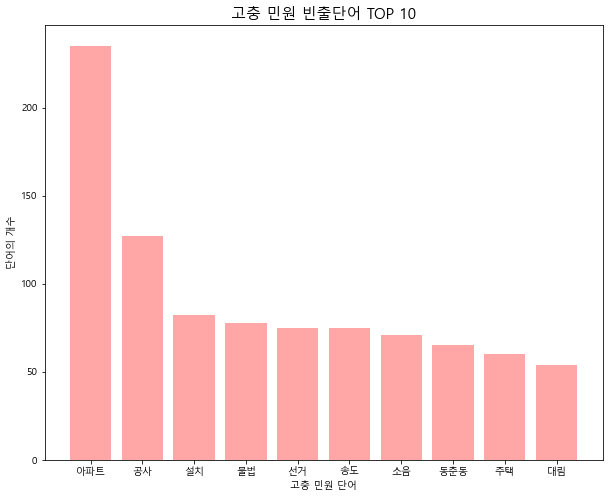

- 고충민원_Top10_Bargraph.png 가 저장 되었습니다.



In [19]:
# 막대그래프 생성 함수 실행
# top 변수 : top_n(file3) 함수 에서 global로 지정

topn_bar(top)

# 워드클라우드

In [20]:
# 워드클라우드 생성 함수
def Grievance_wordcloud(filename):
    
    print(f'{filename}의 워드 클라우드 생성하는 중 ..')

    # 워드클라우드를 생성할 파일 불러오기
    with open(filename, encoding='utf8') as f:
        data = f.read()
        
        # text 중에서 ',', '/' 등 불필요한 기호 부분 없애기
        data = re.sub('[^\s\w]', ' ', data)
        data = re.sub('\s+', ' ', data)

        # text 중에서 관련없는 단어 삭제를 위한 stopwords_list 설정
        stopwords_list = ['관련', '요청', '관리', '대한', '사항', '조정', '중지', '작업', '승인', '이의제기', '규약', '규정', '위반'
                         '불법', '위반','및','고발 건', '민원','대표', '하다','등', '인하다', '있다', '주자', '회의', '요구', '번지',
                         '단속', '시설', '주변']

        # 삭제할 단어를 replace를 이용하여 '' 로 변경
        for i in range(len(stopwords_list)):
            data = data.replace(stopwords_list[i], '')

        # 불필요하게 생성된 공백 제거
        data = " ".join(data.split())

        # text 파일 정제하기
        engine = Okt()
        all_nouns = engine.nouns(data)
        nouns = [n for n in all_nouns if len(n) > 1]
        
        # 개수 count
        count = Counter(nouns)

        tags = count.most_common(100)
        
        # 랜덤 함수
        import random as r
        
        # 워드클라우드 생성 : 세부값 설정        
        wc = WordCloud(font_path = font_fname, # font가 있는 위치
                       # background_color = (r.randint(0,255),r.randint(0,255), r.randint(0,255)), # 랜덤으로 색상 설정
                       # background_color = ('241, 105, 158'), # 임의로 색상 설정해보기
                       background_color = ('white'), # 색상이름으로 설정해보기
                       width = 3000, # 크기설정
                       height = 2000)
        
        cloud = wc.generate_from_frequencies(dict(tags))
        
        # 이미지로 보여주기
        plt.imshow(cloud, interpolation='bilinear')
        plt.axis('off')
        
        # 이미지파일로 저장 : 고충민원_wordscloud.png
        # 원하는 위치에 저장하려면 경로 설정 ! : graphs/fig_name.png
        fig_name = f'{filename}_wordclouds.png'
        plt.savefig(fig_name)
        plt.show()
    
    # 함수 실행 확인
    print(f'- {filename}의 워드 클라우드가 저장되었습니다.')

## 전체(2014~2022) 워드클라우드

고충민원_text.txt의 워드 클라우드 생성하는 중 ..


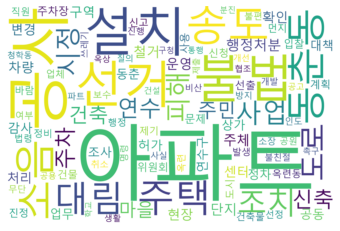

- 고충민원_text.txt의 워드 클라우드가 저장되었습니다.


In [21]:
# 정제된 text 파일
# 고충민원 완료 text : '고충민원_text_data.txt'
filename = '고충민원_text.txt'

# 함수 실행
Grievance_wordcloud(filename)